### Imports
---

In [2]:
#Python3.10

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dataretrieval import nwis, utils, codes

ModuleNotFoundError: No module named 'dataretrieval'

### Inputs
---

In [4]:
STATE_CODE = 'ca'

### Data Retrieval
---

In [5]:
#Peak data for each site in CA (returns multi-level indexed df)
df = nwis.get_record(state_cd=STATE_CODE.lower(), service='peaks', start='1990-01-01')

#Reset the index as we don't want multi-level indexing for this
df = df.reset_index()
#df.to_csv('ca_peaks.csv')

### Peaks Heatmap<br>
---
<p>This heatmap shows the mean flow of all streamflow gauges peaking during a given month and year combination in the specified state</p>

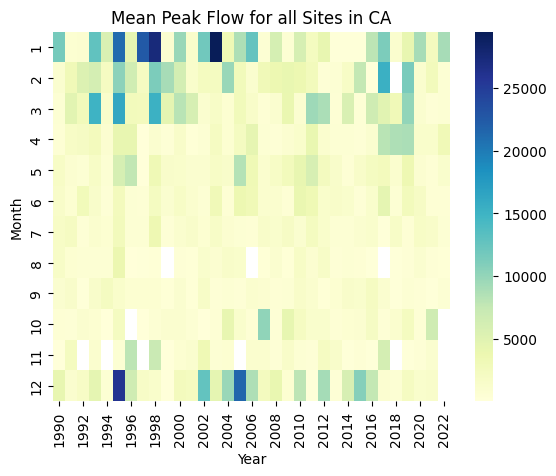

In [51]:
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month

pivot_table = df.groupby(['Month', 'Year'])['peak_va'].mean().unstack()
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title(f'Mean Peak Flow for all Sites in {STATE_CODE.upper()}')
plt.show()

### Using Climata
---

In [22]:
#Python3.8
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO

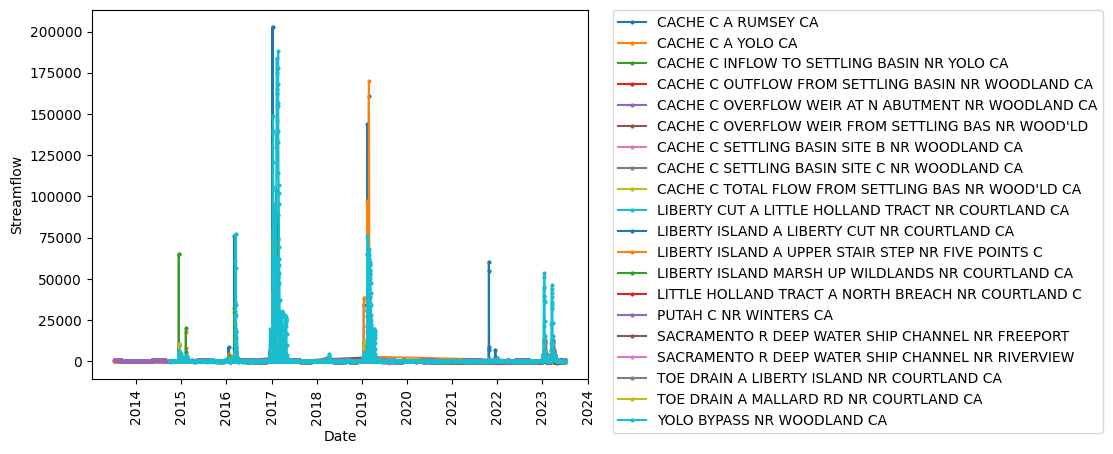

In [23]:
nyears = 10
ndays = 365 * nyears
county = "06113"

from datetime import date
datelist = pd.date_range(end=date.today(), periods=ndays).tolist()

data = DailyValueIO(
    start_date=datelist[0],
    end_date=datelist[-1],
    county=county,
)

date = []
value = []

for series in data:
    for row in series.data:
        date.append(row[0])
        value.append(row[1])
        
site_names = [[series.site_name] * len(series.data) for series in data]

# unroll the list of lists
flat_site_names = [item for sublist in site_names for item in sublist]

# bundle the data into a data frame
df = pd.DataFrame({'site': flat_site_names, 
                   'date': date, 
                   'value': value})

# remove missing values
df = df[df['value'] != -999999.0]


# visualize flow time series, coloring by site
groups = df.groupby('site')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.date, group.value, marker='o', linestyle='-', ms=2, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.xticks(rotation='vertical')
plt.show()